In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Kannada-MNIST/sample_submission.csv
/kaggle/input/Kannada-MNIST/Dig-MNIST.csv
/kaggle/input/Kannada-MNIST/train.csv
/kaggle/input/Kannada-MNIST/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf

In [3]:
train = pd.read_csv('/kaggle/input/Kannada-MNIST/train.csv')
test  = pd.read_csv('/kaggle/input/Kannada-MNIST/test.csv')

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = train.values[:, 1:].reshape((-1,28,28,1)) / 255.
y = tf.keras.utils.to_categorical(train.values[:, 0], 10)
X.shape, y.shape

((60000, 28, 28, 1), (60000, 10))

## Training and Prediction

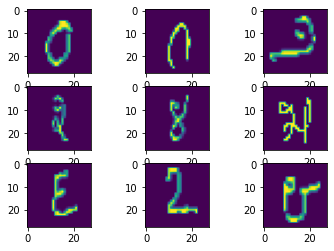

In [7]:
for i in range(9):
    plt.subplot(331+i)
    plt.imshow(X[i])
plt.show()

In [8]:
model=tf.keras.Sequential([
                           tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
                           tf.keras.layers.BatchNormalization(),
                           tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.BatchNormalization(),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(100,activation="relu"),
                           tf.keras.layers.BatchNormalization(),
                           tf.keras.layers.Dense(10,activation="softmax")]) 

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01,momentum=0.9),loss="categorical_crossentropy",metrics=["accuracy"])
history=model.fit(X, y, validation_split=0.2 ,batch_size=32,epochs=5,verbose=1)

2022-08-29 13:00:24.861225: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 13:00:25.028559: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 13:00:25.032797: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 13:00:25.038254: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/5


2022-08-29 13:00:31.284388: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1500/1500 [==============================] - 18s 6ms/step - loss: 0.0697 - accuracy: 0.9794 - val_loss: 0.0358 - val_accuracy: 0.9881
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0198 - accuracy: 0.9940 - val_loss: 0.0551 - val_accuracy: 0.9825
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0110 - accuracy: 0.9969 - val_loss: 0.0168 - val_accuracy: 0.9946
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0092 - accuracy: 0.9973 - val_loss: 0.0262 - val_accuracy: 0.9927
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0044 - accuracy: 0.9990 - val_loss: 0.0180 - val_accuracy: 0.9947


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               9

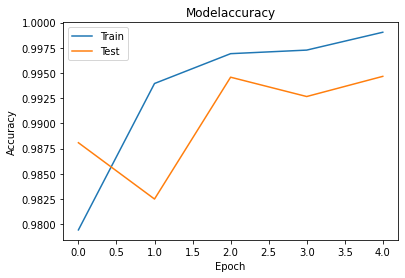

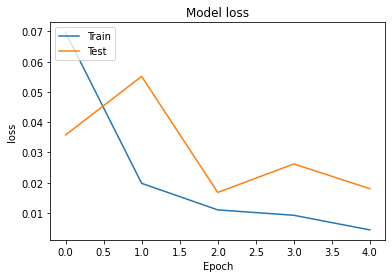

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Modelaccuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

## Submission

In [11]:
pred=model.predict(test.values[:, 1:].reshape((-1,28,28,1)) / 255.)
classes = pred.argmax(axis=-1)
classes

array([3, 0, 2, ..., 1, 6, 3])

In [12]:
submission = pd.read_csv('../input/Kannada-MNIST/sample_submission.csv')
submission['label']=classes
submission.to_csv('submission.csv', index=False)
submission.head()

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7
